In [1]:
from sentence_transformers import SentenceTransformer
import numpy as np

model_name = 'intfloat/e5-large-v2'
embeddings_attr_name = 'embeddings.position_embeddings'

# load model
sentence_transformer = SentenceTransformer(model_name, device='cpu')
model = sentence_transformer._first_module().auto_model

# get positional embeddings weight
embeddings = model
for attr_name in embeddings_attr_name.split('.'):
    embeddings = getattr(embeddings, attr_name)
weight = np.array(embeddings.weight.clone().detach().tolist())

nembs = weight.shape[0]
ndims = weight.shape[1]

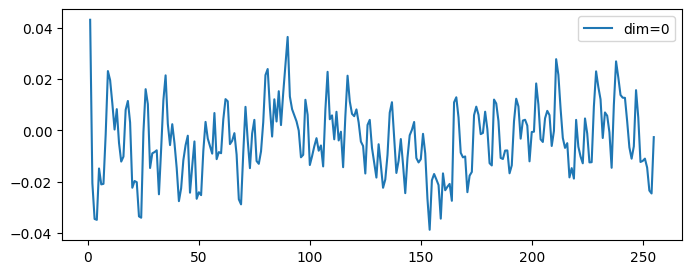

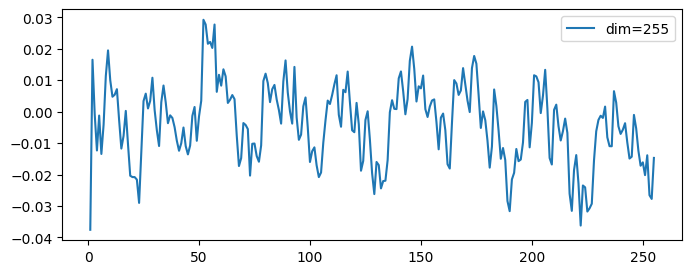

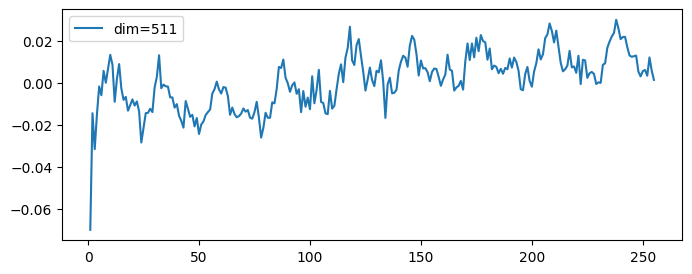

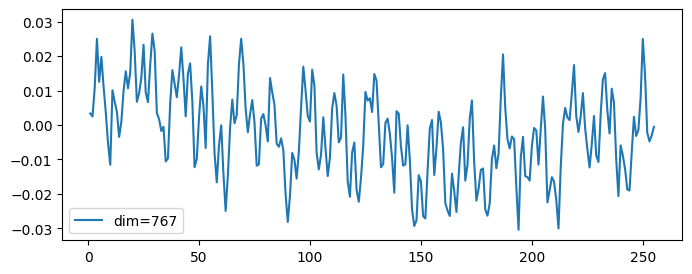

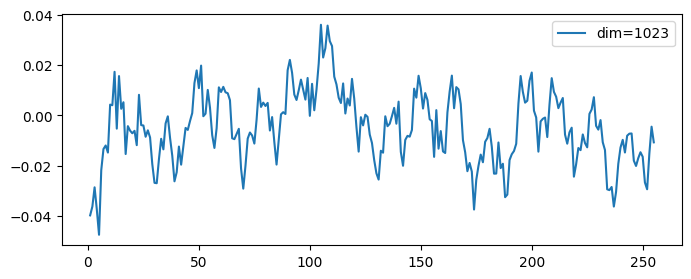

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

idx_start = 0
idx_end = 255
for dim in [0, 255, 511, 767, 1023]:
    fig = plt.figure(figsize=(8, 3))
    y = weight[idx_start:idx_end, dim]
    x = np.arange(idx_start or 0, len(y) + (idx_start or 0), 1)
    x += 1 
    
    sns.lineplot(x=x, y=y, label=f'{dim=}')
    plt.show()